### Orientation (Aspect)

Extraction de la carte aspect depuis la carte elevatiom

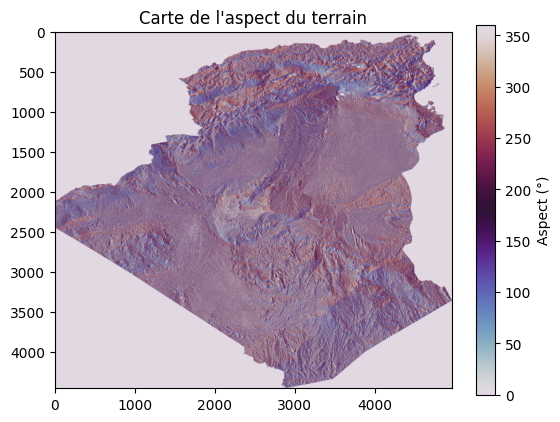

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Charger le DEM (carte d'élévation)
# ===============================
dem_path = "/content/drive/MyDrive/data_set/Elevation/clipped_algeria_tunisia.tif"
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    transform = src.transform

# ===============================
# Calcul du gradient
# ===============================
# dx et dy en mètres (coordonnées projetées)
x, y = np.gradient(dem, transform[0], transform[4])

# ===============================
# Calcul de l'aspect (orientation)
# ===============================
aspect = np.arctan2(-x, -y)  # négatif pour se conformer à la convention
aspect = np.degrees(aspect)
aspect = np.where(aspect < 0, 360 + aspect, aspect)  # valeurs entre 0 et 360°

# ===============================
# Affichage
# ===============================
plt.imshow(aspect, cmap='twilight')
plt.colorbar(label='Aspect (°)')
plt.title("Carte de l'aspect du terrain")
plt.show()


# Analyse et visualisation

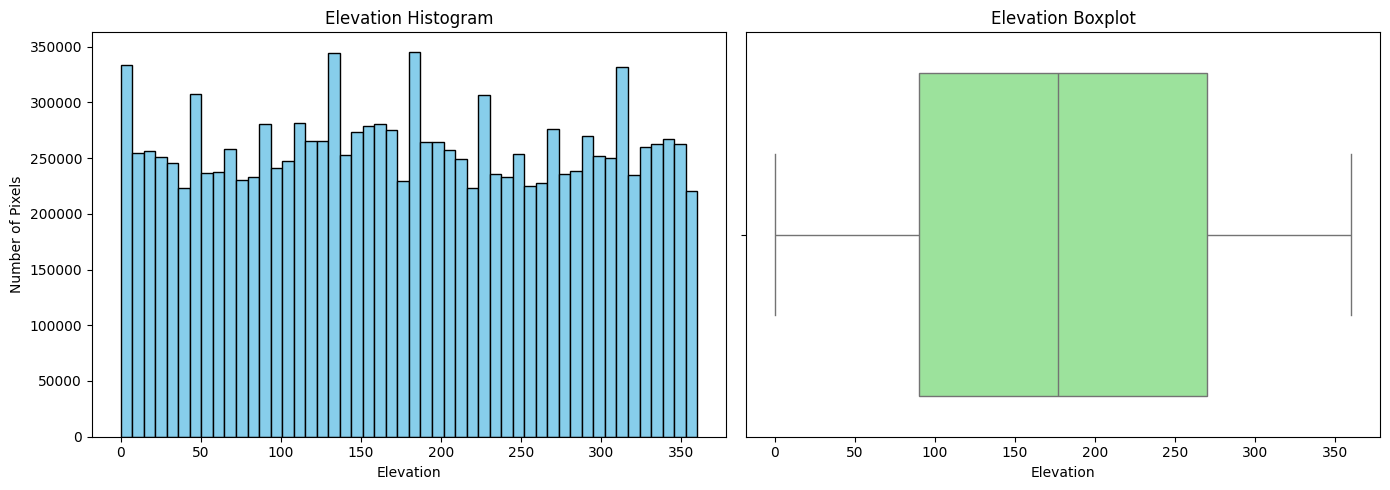

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to clipped raster
raster_path = "/content/drive/MyDrive/data_set/Elevation/Aspect.tif"

# Open raster
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)
    nodata_value = src.nodata

# Mask nodata values
valid_pixels = raster_data[raster_data != nodata_value]

# Set up the figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Histogram
axes[0].hist(valid_pixels, bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Elevation")
axes[0].set_ylabel("Number of Pixels")
axes[0].set_title("Elevation Histogram")

# Boxplot
sns.boxplot(x=valid_pixels, ax=axes[1], color='lightgreen')
axes[1].set_xlabel("Elevation")
axes[1].set_title("Elevation Boxplot")

plt.tight_layout()
plt.show()
